<a href="https://colab.research.google.com/github/shatakshii25/Python-and-ML-Practice-Notebooks/blob/main/class12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Logistic Regression - a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a dataset
# Logistical model predicts a dependent variable by analysing the relationship between independent variables 

In [2]:
# Linear regression is all about fitting a straight line in the data
# Logistic regression is about fitting a s-shaped curve into the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.shape

(400, 5)

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
# EDA, data visualisation
import matplotlib.pyplot as plt

In [10]:
x = df.iloc[:,[2,3]].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
y = df.iloc[:,-1].values

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [14]:
# 400 rows (75% training data 25% testing data)
# 0.75 * 400 = 300 for training
# 0.25 * 400 = 100 for testing

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model

LogisticRegression()

In [17]:
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred # predicted output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y_test # actual output

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [20]:
# values predicted are incorrect, hence we need to do scaling/normalisation
# scaling is done only to inputs to get the input values within the perfect range

In [21]:
np.min(df['Age'])

18

In [22]:
np.max(df['EstimatedSalary'])

150000

In [23]:
np.min(df['EstimatedSalary'])

15000

In [24]:
# Example for MinMaxScaler
np.random.seed(134) # seed initialises the values to one particular set of numbers - graph won't change because we have added the seed (we can add any number inside the seed function)
x1 = np.random.randint(18, 60, 30)
x1

array([53, 56, 38, 38, 47, 33, 40, 23, 34, 53, 32, 37, 42, 45, 41, 58, 41,
       21, 36, 31, 19, 41, 32, 40, 47, 44, 58, 50, 27, 53])

In [25]:
x1 = np.sort(x1)

In [26]:
x2 = np.random.randint(15000, 150000, 30)
x2

array([ 50314, 147750,  18067, 114167, 133444,  38784,  91232,  27193,
        50866,  62225, 108336,  26295,  28764,  27819,  35073,  70039,
        98719,  45059,  58544, 118964,  93514,  55553, 143816,  64365,
        16337,  45662,  63165,  68666,  18931,  86053])

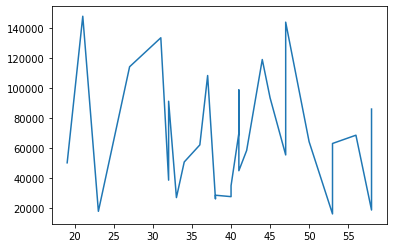

In [27]:
plt.plot(x1, x2)

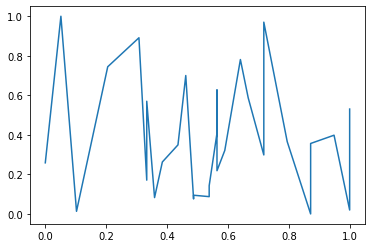

In [28]:
x1min = min(x1)
x1max = max(x1)
x2min = min(x2)
x2max = max(x2)
x1norm = (x1-x1min)/(x1max-x1min)
x2norm = (x2-x2min)/(x2max-x2min)
plt.plot(x1norm, x2norm)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [30]:
x_train # we need to normalise these values in between 0 and 1

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [31]:
x_train = scale.fit_transform(x_train) # Note - we can do scaling only to x values as it is the input

In [32]:
x_test = scale.transform(x_test)

In [33]:
x_train

array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [36]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [37]:
# actual output
np.unique(y_test, return_counts=True)

(array([0, 1]), array([68, 32]))

In [38]:
# predicted output
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([77, 23]))

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]])

In [41]:
# 67 - TRUE POSITIVE     67 values are correctly predicted as 1                 [TP    FP]
# 1 - FALSE POSITIVE     1 value is wrongly predicted as 1                      [FN    TN]
# 10 - FALSE NEGATIVE    10 values are wrongly predicted as 0
# 22 - TRUE NEGATIVE     22 values are correctly predicted as 0

# TRUE - correctly predicted
# FALSE - wrongly predicted

# POSITIVE - 1 (purchased)
# NEGATIVE -0 (not purchased)

In [42]:
#  Accuracy score 
accuracy = (67+22)/(67+1+10+22)

In [43]:
accuracy

0.89

In [44]:
# Precision
precision = (67)/(67+1)
precision

0.9852941176470589

In [45]:
# Recall
recall = (67)/(67+10)
recall

0.8701298701298701

In [46]:
# F1-Score
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9241379310344828

In [47]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [48]:
# one hot encoding
gender = pd.get_dummies(['Gender'])
gender

,Gender
0,1


In [49]:
gender = pd.get_dummies(df['Gender'])
gender

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [50]:
x = pd.concat([df, gender], axis=1)

In [51]:
x

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [52]:
x = x.drop('Gender', axis=1)

In [53]:
x

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [54]:
np.round(df['EstimatedSalary'], 2)

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64